# Math 76 HW2, Fall 2024

**Name:**

For all plots, make sure to include a title, x-axis label, and y-axis label.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma as gamma_func

from hw2_helper_funcs import *

# Problem 3.5

## Part A

Derive the formula 
\begin{align}
a_{ij} = \frac{d}{n} \left( d^2 + ((i-j)/n)^2 \right)^{-3/2}, \quad i,j = 1, \ldots, n
\end{align}
for the matrix elements.

**Response:** *(it may be easier to do this on paper and submit it alongside the notebook)*

## Part B

Compute $ b = A x $ for two different exact solutions $x$: (1) a smooth solution (not a constant or linear vector) and (2) a vector with one or more jump discontinuities. Plot both vectors and label them.

In [6]:
# Parameters
n = 32
d = 0.3

# Build A matrix
A = build_gravity_matrix(n,d)

# Smooth x vector: a function
x_smooth = np.sin(np.linspace(0, 2*np.pi, n))

# Piecewise constant x vector: certain values are 0 certain are 1
x_piecewise_constant = np.zeros(n)
x_piecewise_constant[0:8] = 1

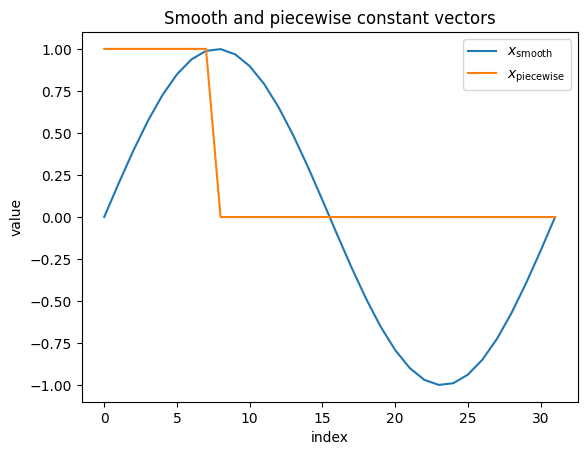

In [7]:
plt.plot(x_smooth, label="$x_{\\text{smooth}}$")
plt.plot(x_piecewise_constant, label="$x_{\\text{piecewise}}$")
plt.xlabel("index")
plt.ylabel("value")
plt.title("Smooth and piecewise constant vectors")
plt.legend()
plt.show()

In [8]:
# Compute rhs vectors
b_smooth = A @ x_smooth
b_piecewise_constant = A @ x_piecewise_constant

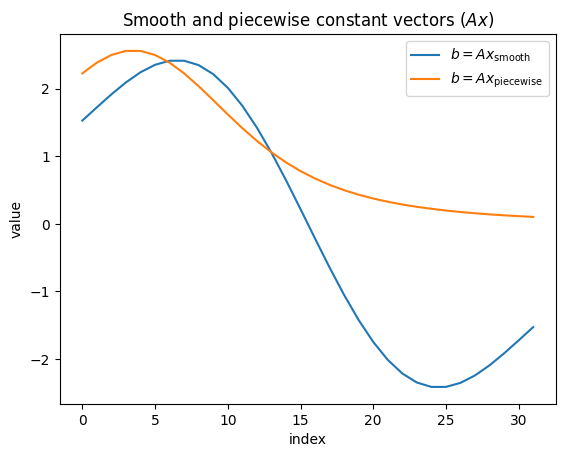

In [9]:
plt.plot(b_smooth, label="$b = A x_{\\text{smooth}}$")
plt.plot(b_piecewise_constant, label="$b = A x_{\\text{piecewise}}$")
plt.xlabel("index")
plt.ylabel("value")
plt.title("Smooth and piecewise constant vectors ($A x$)")
plt.legend()
plt.show()

# Part C

Study how the RHS vectors change with the depth parameter $d$. *Suggestion: plot the rhs vectors $b$ for varying parameter $d$ on the same plot. Make sure to label each curve with the value of $d$ that was used.*

### For smooth $x_{\text{true}}$

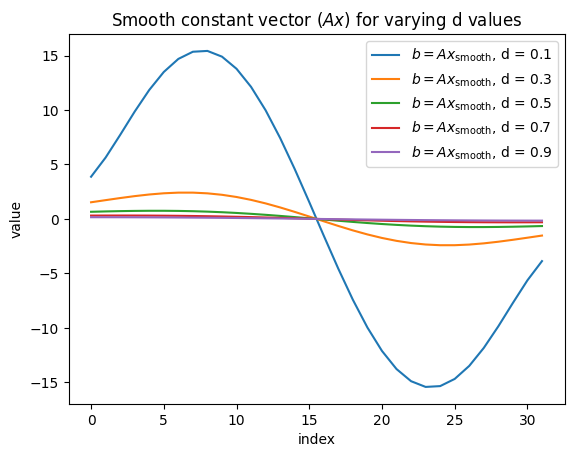

In [10]:
# Original Parameters
# n = 32
# d = 0.3

d_vals = [0.1, 0.3, 0.5, 0.7, 0.9]
for d_val in d_vals:
    A = build_gravity_matrix(n,d_val)
    b_smooth = A @ x_smooth

    plt.plot(b_smooth, label="$b = A x_{\\text{smooth}}$, d = " + str(d_val))
plt.xlabel("index")
plt.ylabel("value")
plt.title("Smooth constant vector ($A x$) for varying d values")
plt.legend()
plt.show()

### For piecewise constant $x_{\text{true}}$

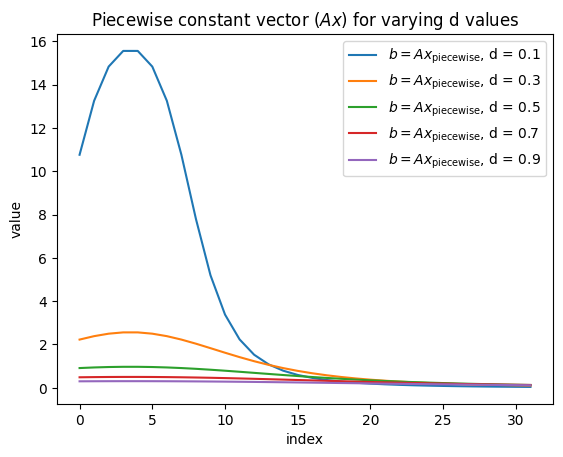

In [11]:
######################
### Your code here ###
######################
d_vals = [0.1, 0.3, 0.5, 0.7, 0.9]
for d_val in d_vals:
    A = build_gravity_matrix(n,d_val)
    b_piecewise_constant = A @ x_piecewise_constant
    plt.plot(b_piecewise_constant, label="$b = A x_{\\text{piecewise}}$, d = " + str(d_val))
plt.xlabel("index")
plt.ylabel("value")
plt.title("Piecewise constant vector ($A x$) for varying d values")
plt.legend()
plt.show()

## Part D

Study how the condition number of $A$ varies for varying $d$ and fixed $n$; then, study how the condition number of $A$ varies for varying $n$ but fixed $d$.

### Varying $d$, fixed $n$

In [12]:
######################
### Your code here ###
######################

d_vals = [0.1, 0.3, 0.5, 0.7, 0.9]


for d_val in d_vals:
    # Build A matrix
    A = build_gravity_matrix(n,d_val)
    # Compute condition number
    cond_num = np.linalg.cond(A)
    print(f"Condition number for d = {d_val}: {cond_num}")


Condition number for d = 0.1: 2524.039648089326
Condition number for d = 0.3: 343895623947.01263
Condition number for d = 0.5: 1.1470311099913811e+17
Condition number for d = 0.7: 1.4227363925943242e+18
Condition number for d = 0.9: 7.967897247480844e+17


**Explanation of observed behavior:**

### Varying $n$, fixed $d$

In [13]:
######################
### Your code here ###
######################
n_vals = [32, 64, 128, 256, 512]

for n_val in n_vals:
    A = build_gravity_matrix(n_val,d)
    cond_num = np.linalg.cond(A)
    print(f"Condition number for n = {n_val}: {cond_num}")

Condition number for n = 32: 343895623947.01263
Condition number for n = 64: 4.694860941326136e+18
Condition number for n = 128: 9.69459408569164e+18
Condition number for n = 256: 2.5400586175338906e+19
Condition number for n = 512: 1.4860320720797054e+20


**Explanation of observed behavior:**

The condition number of a matrix \( A \) is a measure of how sensitive the solution of a linear system \( A x = b \) is to changes or errors in the data. It is defined as the ratio of the largest singular value of \( A \) to the smallest singular value of \( A \). A high condition number indicates that the matrix is close to being singular, and small changes in the input can lead to large changes in the output.

#### Varying \( d \), Fixed \( n \)

When we vary the depth parameter \( d \) while keeping the matrix size \( n \) fixed, we observe changes in the condition number. The parameter \( d \) affects the entries of the matrix \( A \), which in turn influences its singular values. As \( d \) increases, the matrix \( A \) may become more ill-conditioned, leading to a higher condition number. This is because larger values of \( d \) can cause the matrix entries to become more disparate, increasing the ratio of the largest to smallest singular values.

#### Varying \( n \), Fixed \( d \)

When we vary the matrix size \( n \) while keeping the depth parameter \( d \) fixed, we also observe changes in the condition number. Increasing \( n \) generally increases the size of the matrix \( A \), which can lead to a higher condition number. This is because larger matrices tend to have a wider range of singular values, increasing the ratio of the largest to smallest singular values. Additionally, as \( n \) increases, the matrix \( A \) may capture more detailed variations in the data, which can further contribute to a higher condition number.

In summary, both increasing \( d \) and \( n \) can lead to higher condition numbers, indicating that the matrix \( A \) becomes more ill-conditioned and the solutions to the linear system \( A x = b \) become more sensitive to errors in the data.

## Part E

Solve the problem $A x = b$ using a noise-free rhs $b$. Then, try again but instead solve $A x = b + \delta$ where $\delta$ is a white noise Gaussian vector $\delta \sim \mathcal{N}(\mathbf{0}, \sigma^2 \mathbf{I})$.

In [14]:
# Parameters
n = 32
d = 0.3

# Build matrix
A = build_gravity_matrix(n,d)

# Get exact b's
b_smooth = A @ x_smooth
b_piecewise_constant = A @ x_piecewise_constant

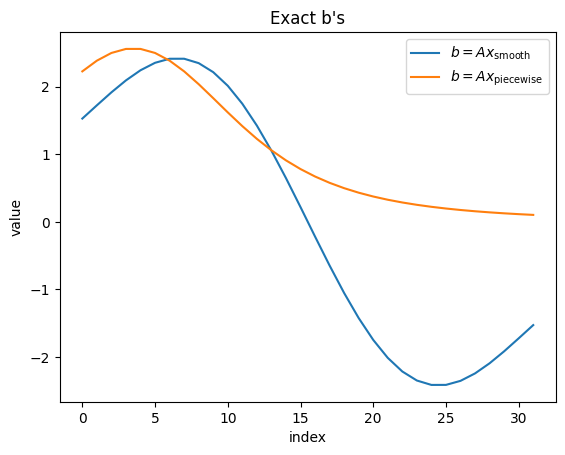

In [15]:
# Plot exact b's
plt.plot(b_smooth, label="$b = A x_{\\text{smooth}}$")
plt.plot(b_piecewise_constant, label="$b = A x_{\\text{piecewise}}$")
plt.xlabel("index")
plt.ylabel("value")
plt.title("Exact b's")
plt.legend()
plt.show()

Solve $A x = b$ (for both smooth and piecewise constant vectors), and plot

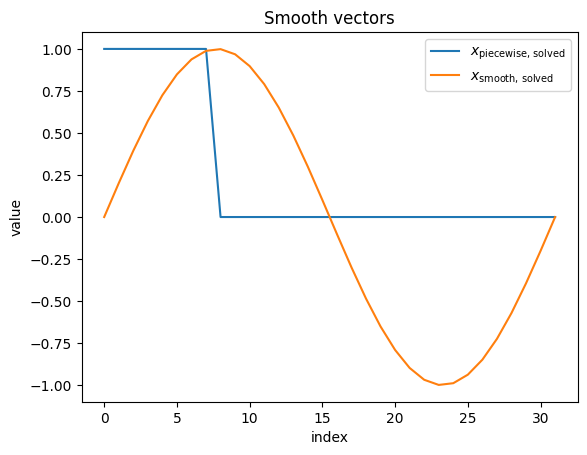

In [16]:
######################
### Your code here ###
######################
# Solve for x_smooth
x_smooth_solved = np.linalg.solve(A, b_smooth)
# Solve for x_piecewise_constant
x_piecewise_constant_solved = np.linalg.solve(A, b_piecewise_constant)

# Plot the results
plt.plot(x_piecewise_constant_solved, label="$x_{\\text{piecewise, solved}}$")
plt.plot(x_smooth_solved, label="$x_{\\text{smooth, solved}}$")
plt.xlabel("index")
plt.ylabel("value")
plt.title("Smooth vectors")
plt.legend()
plt.show()

Solve $A x = b + \delta$ (for both smooth and piecewise constant vectors), and plot

<>:39: SyntaxWarning: invalid escape sequence '\d'
<>:40: SyntaxWarning: invalid escape sequence '\d'
<>:39: SyntaxWarning: invalid escape sequence '\d'
<>:40: SyntaxWarning: invalid escape sequence '\d'
/var/folders/v3/4n07n0wx3dq1zjxhjbt61wyc0000gn/T/ipykernel_28942/1312133526.py:39: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(b_smooth_noisy, label="$b = A x_{\\text{smooth}} + \delta$")
/var/folders/v3/4n07n0wx3dq1zjxhjbt61wyc0000gn/T/ipykernel_28942/1312133526.py:40: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(b_piecewise_constant_noisy, label="$b = A x_{\\text{piecewise}} + \delta$")


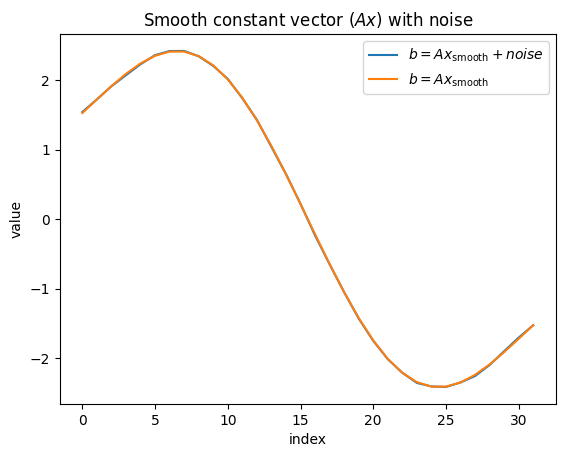

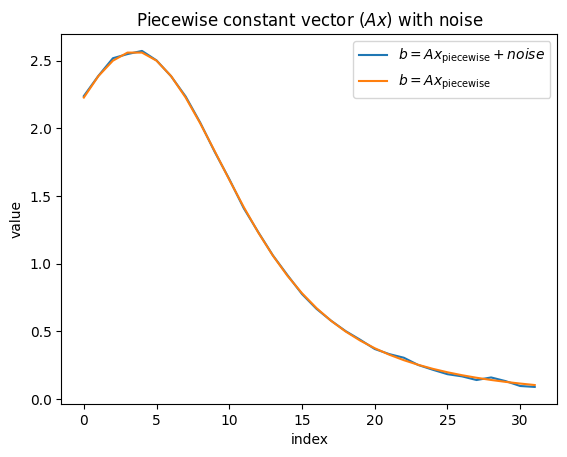

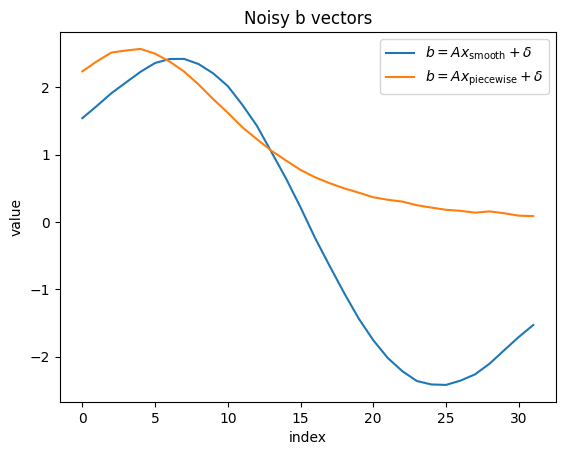

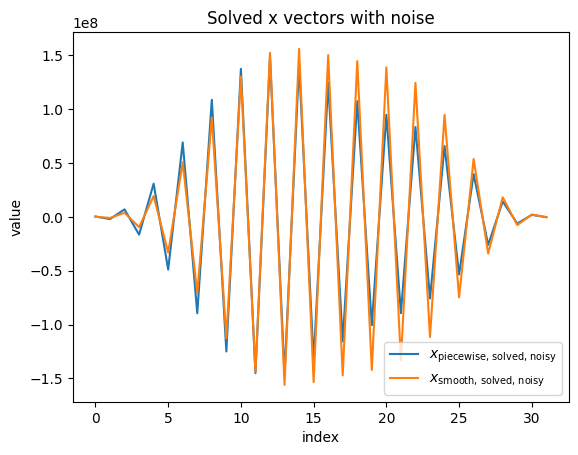

In [17]:
######################
### Your code here ###
######################
# Define the standard deviation of the noise
sigma = 0.01

# Generate the noise vector
delta = np.random.normal(0, sigma, b_smooth.shape)

# Add the noise to the smooth and piecewise vectors
b_smooth_noisy = b_smooth + delta
delta_piecewise = np.random.normal(0, sigma, b_piecewise_constant.shape)
b_piecewise_constant_noisy = b_piecewise_constant + delta_piecewise

# Plot the noisy vectors vs the original vectors
plt.plot(b_smooth_noisy, label="$b = A x_{\\text{smooth}} + noise$")
plt.plot(b_smooth, label="$b = A x_{\\text{smooth}}$")
plt.xlabel("index")
plt.ylabel("value")
plt.title("Smooth constant vector ($A x$) with noise")
plt.legend()
plt.show()

plt.plot(b_piecewise_constant_noisy, label="$b = A x_{\\text{piecewise}} + noise$")
plt.plot(b_piecewise_constant, label="$b = A x_{\\text{piecewise}}$")
plt.xlabel("index")
plt.ylabel("value")
plt.title("Piecewise constant vector ($A x$) with noise")
plt.legend()
plt.show()

# Solve for noisy x_smooth
x_smooth_solved_noisy = np.linalg.solve(A, b_smooth_noisy)
# Solve for noisy x_piecewise_constant
x_piecewise_constant_solved_noisy = np.linalg.solve(A, b_piecewise_constant_noisy)


# Plot the noisy b vectors
plt.plot(b_smooth_noisy, label="$b = A x_{\\text{smooth}} + \delta$")
plt.plot(b_piecewise_constant_noisy, label="$b = A x_{\\text{piecewise}} + \delta$")
plt.xlabel("index")
plt.ylabel("value")
plt.title("Noisy b vectors")
plt.legend()
plt.show()

# Plot the results
plt.plot(x_piecewise_constant_solved_noisy, label="$x_{\\text{piecewise, solved, noisy}}$")
plt.plot(x_smooth_solved_noisy, label="$x_{\\text{smooth, solved, noisy}}$")
plt.xlabel("index")
plt.ylabel("value")
plt.title("Solved x vectors with noise")
plt.legend()
plt.show()

How large can $||\delta||_2$ get before the inverted noise starts to dominate? Design a computational study/visualization below to support your claim.

**Response:**

<>:36: SyntaxWarning: invalid escape sequence '\s'
<>:44: SyntaxWarning: invalid escape sequence '\d'
<>:36: SyntaxWarning: invalid escape sequence '\s'
<>:44: SyntaxWarning: invalid escape sequence '\d'
/var/folders/v3/4n07n0wx3dq1zjxhjbt61wyc0000gn/T/ipykernel_28942/790181883.py:36: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel("$\sigma$")
/var/folders/v3/4n07n0wx3dq1zjxhjbt61wyc0000gn/T/ipykernel_28942/790181883.py:44: SyntaxWarning: invalid escape sequence '\d'
  plt.xlabel("$||\delta||_2$")


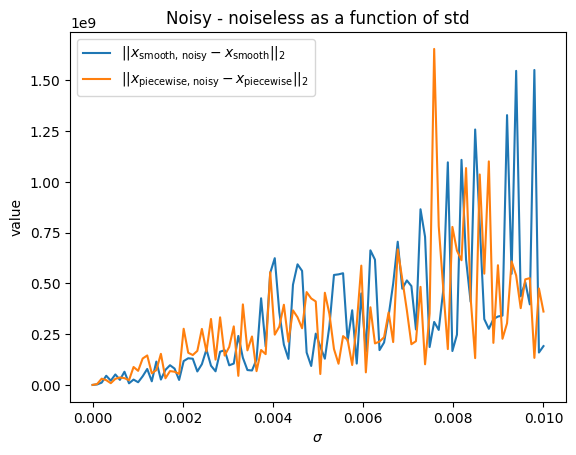

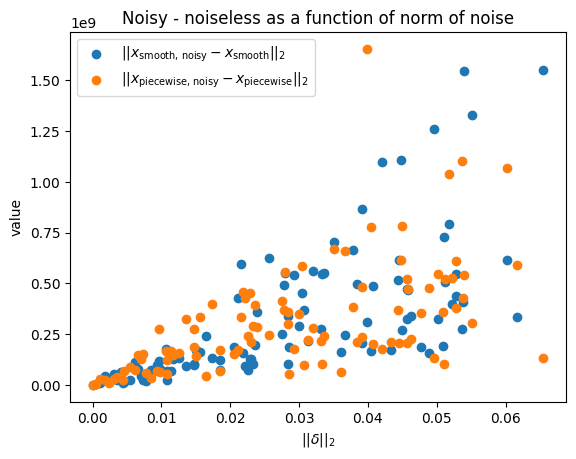

In [18]:
######################
### Your code here ###
######################

# Try out slowly increasing values of delta 
# Compute the norm of the difference from the noiseless solution
# Also, compute $||\delta||_2$
sigma_vals = np.linspace(0, 0.01, 100)
x_smooth_solved_noisy_vals = []
x_piecewise_constant_solved_noisy_vals = []
delta_norm_vals = []
x_smooth_diff_vals = []
x_piecewise_constant_diff_vals = []

for sigma_val in sigma_vals:
    delta = np.random.normal(0, sigma_val, b_smooth.shape)
    b_smooth_noisy = b_smooth + delta
    delta_piecewise = np.random.normal(0, sigma_val, b_piecewise_constant.shape)
    b_piecewise_constant_noisy = b_piecewise_constant + delta_piecewise

    x_smooth_solved_noisy = np.linalg.solve(A, b_smooth_noisy)
    x_piecewise_constant_solved_noisy = np.linalg.solve(A, b_piecewise_constant_noisy)

    x_smooth_diff = x_smooth_solved_noisy - x_smooth_solved
    x_piecewise_constant_diff = x_piecewise_constant_solved_noisy - x_piecewise_constant_solved

    x_smooth_diff_vals.append(np.linalg.norm(x_smooth_diff))
    x_piecewise_constant_diff_vals.append(np.linalg.norm(x_piecewise_constant_diff))
    x_smooth_solved_noisy_vals.append(x_smooth_solved_noisy)
    x_piecewise_constant_solved_noisy_vals.append(x_piecewise_constant_solved_noisy)
    delta_norm_vals.append(np.linalg.norm(delta))

# Plot the results
plt.plot(sigma_vals, x_smooth_diff_vals, label="$||x_{\\text{smooth, noisy}} - x_{\\text{smooth}}||_2$")
plt.plot(sigma_vals, x_piecewise_constant_diff_vals, label="$||x_{\\text{piecewise, noisy}} - x_{\\text{piecewise}}||_2$")
plt.xlabel("$\sigma$")
plt.ylabel("value")
plt.title("Noisy - noiseless as a function of std")
plt.legend()
plt.show()

plt.scatter(delta_norm_vals, x_smooth_diff_vals, label="$||x_{\\text{smooth, noisy}} - x_{\\text{smooth}}||_2$")
plt.scatter(delta_norm_vals, x_piecewise_constant_diff_vals, label="$||x_{\\text{piecewise, noisy}} - x_{\\text{piecewise}}||_2$")
plt.xlabel("$||\delta||_2$")
plt.ylabel("value")
plt.title("Noisy - noiseless as a function of norm of noise")
plt.legend()
plt.show()

This graph is nice, but doesn't really tell us where we should define our threshold. I am going to look at some visual examples to help figure it out.

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
/var/folders/v3/4n07n0wx3dq1zjxhjbt61wyc0000gn/T/ipykernel_28942/2427423696.py:12: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x_smooth_solved_noisy, label="$x_{\\text{smooth, noisy}}$, $\sigma$ = " + str(sigma_val))
/var/folders/v3/4n07n0wx3dq1zjxhjbt61wyc0000gn/T/ipykernel_28942/2427423696.py:21: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x_piecewise_constant_solved_noisy, label="$x_{\\text{piecewise, noisy}}$, $\sigma$ = " + str(sigma_val))


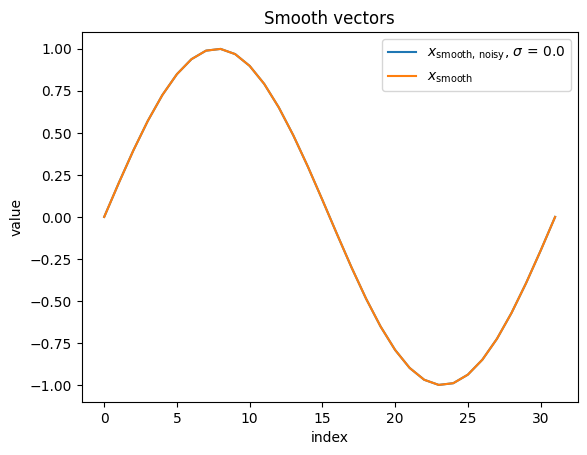

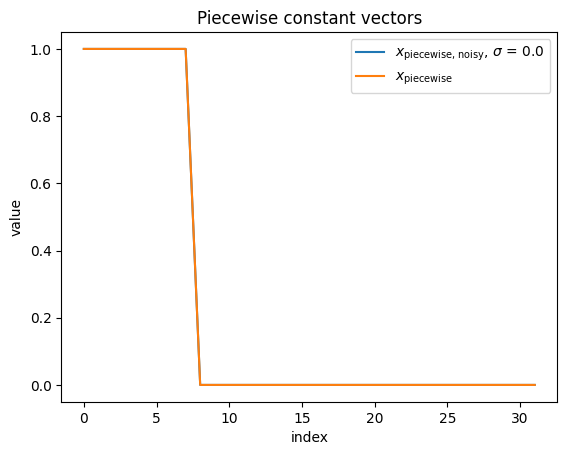

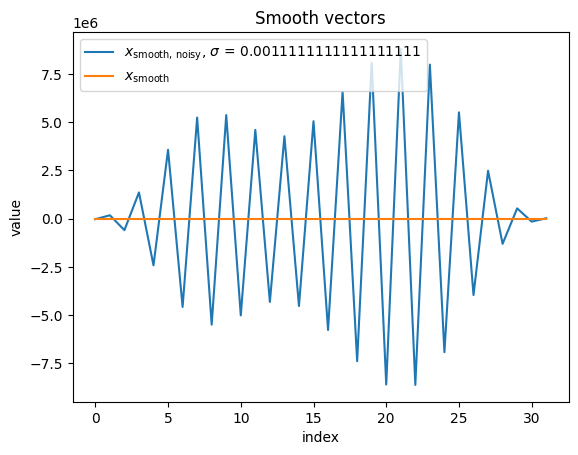

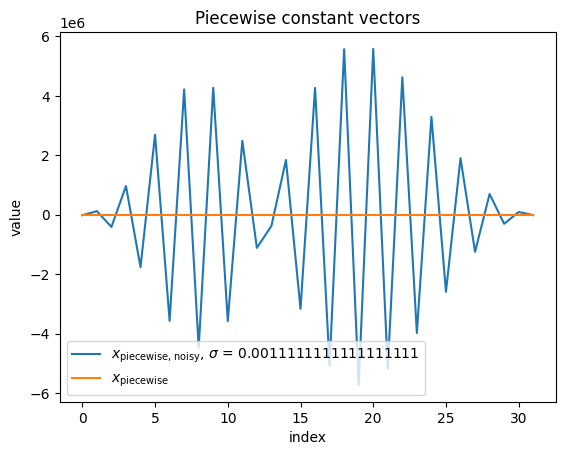

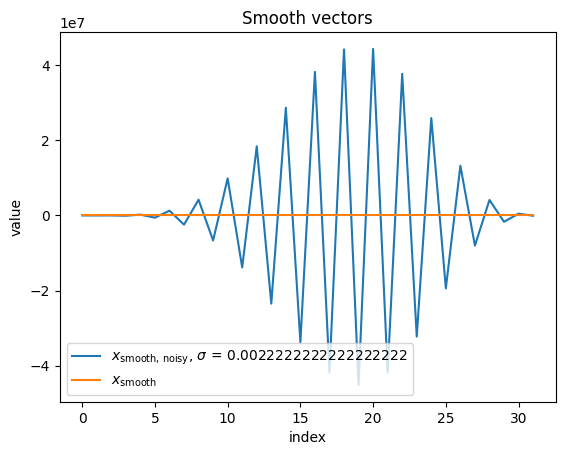

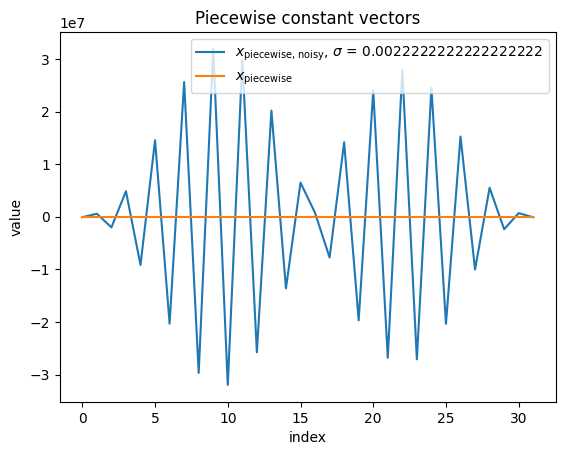

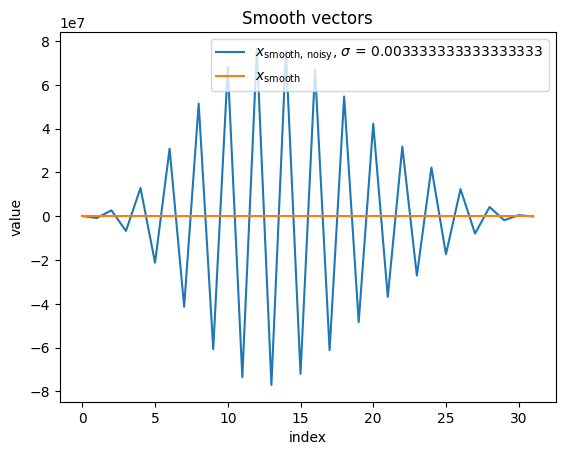

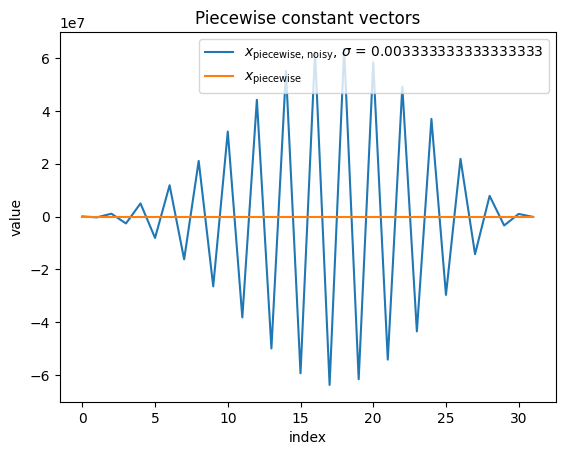

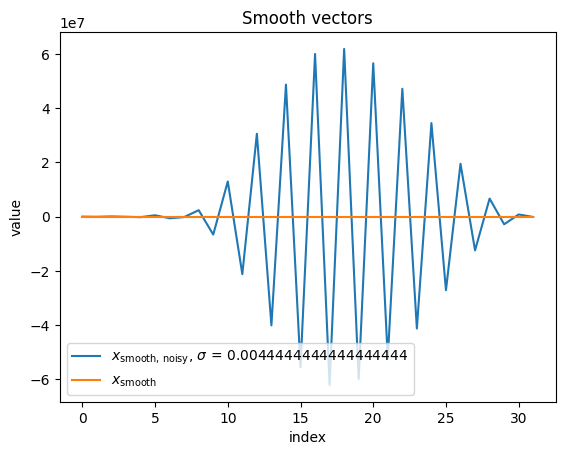

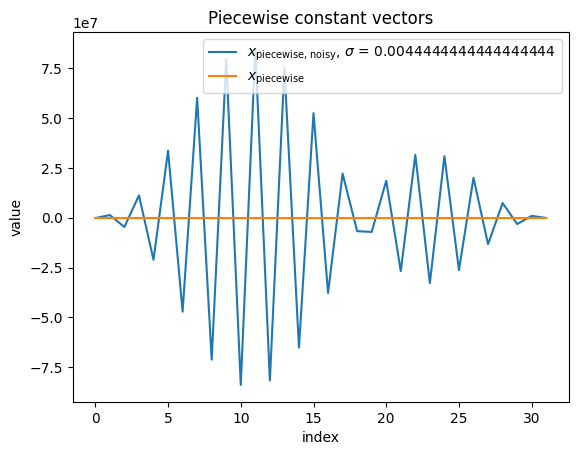

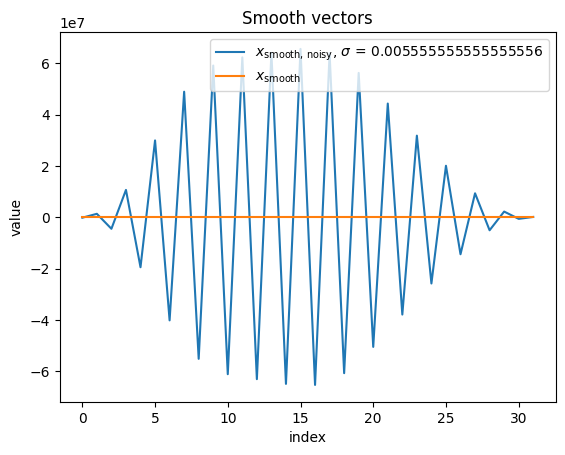

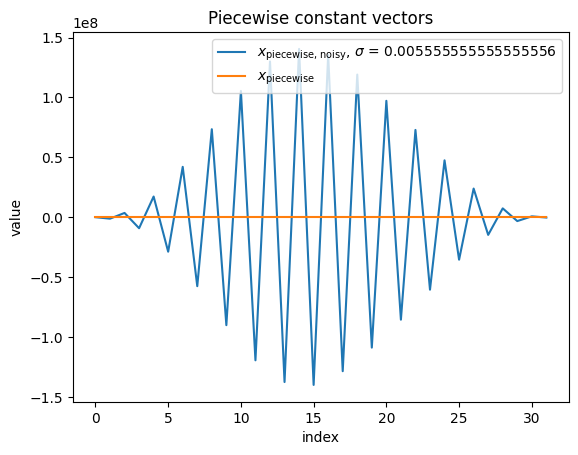

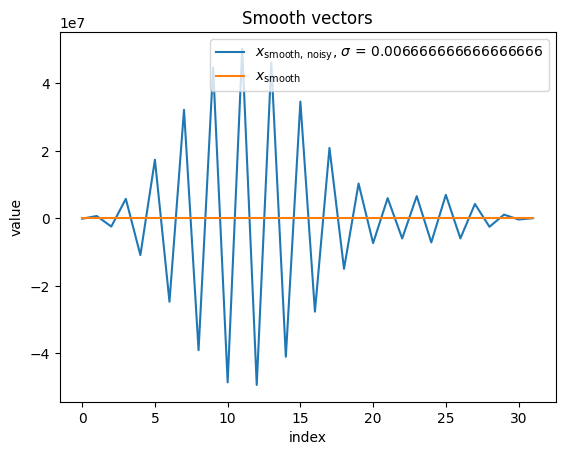

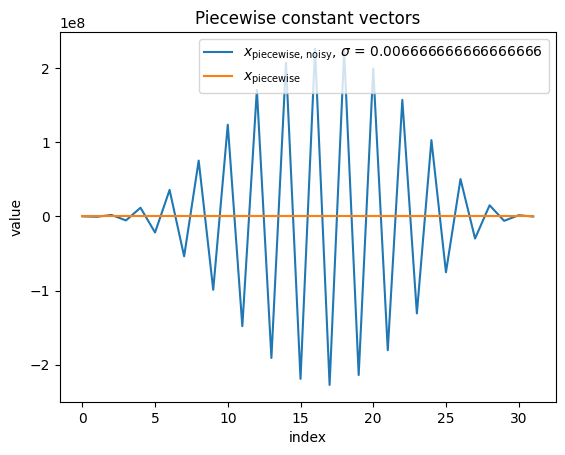

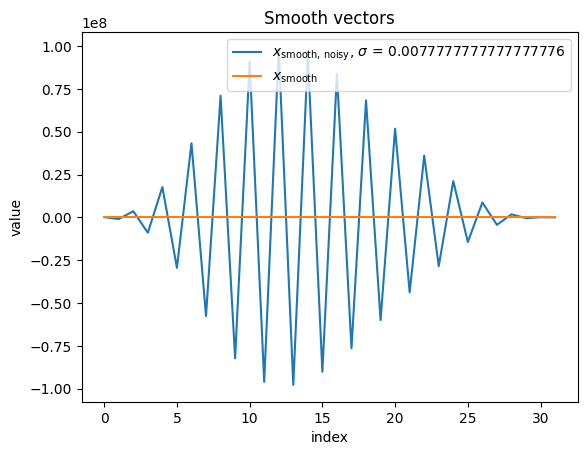

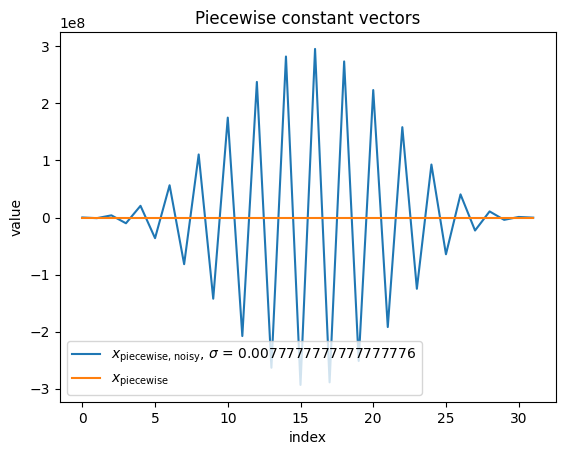

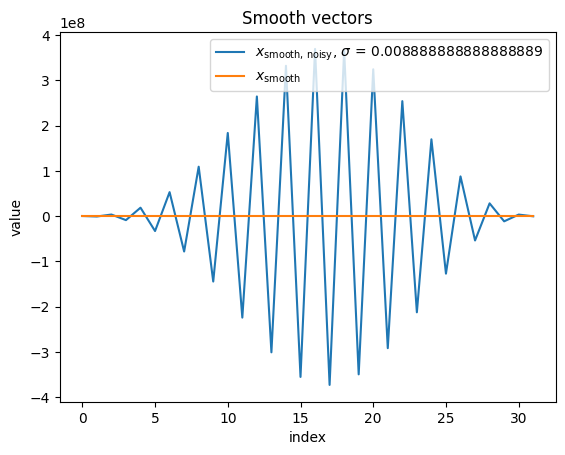

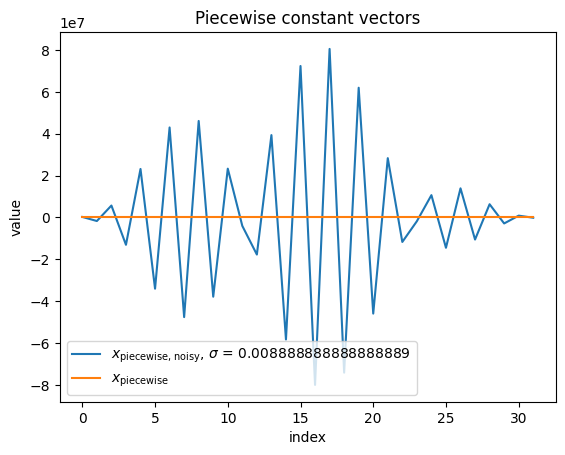

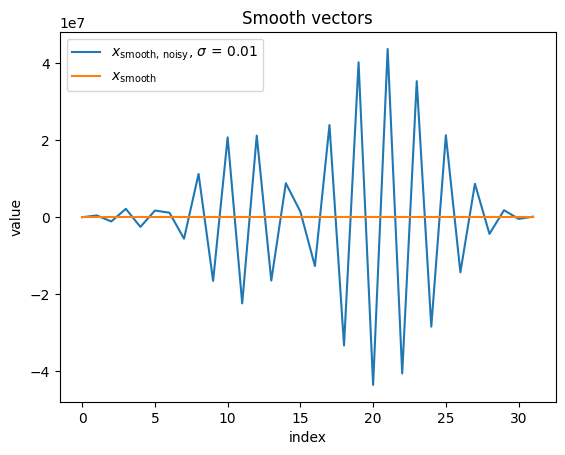

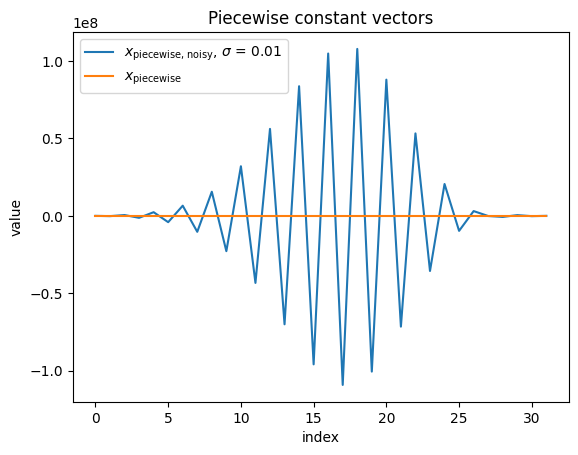

In [19]:
sigma_vals = np.linspace(0, 0.01, 10)
for sigma_val in sigma_vals:
    delta = np.random.normal(0, sigma_val, b_smooth.shape)
    b_smooth_noisy = b_smooth + delta
    delta_piecewise = np.random.normal(0, sigma_val, b_piecewise_constant.shape)
    b_piecewise_constant_noisy = b_piecewise_constant + delta_piecewise

    x_smooth_solved_noisy = np.linalg.solve(A, b_smooth_noisy)
    x_piecewise_constant_solved_noisy = np.linalg.solve(A, b_piecewise_constant_noisy)

    # Compare x_smooth_solved_noisy with x_smooth_solved
    plt.plot(x_smooth_solved_noisy, label="$x_{\\text{smooth, noisy}}$, $\sigma$ = " + str(sigma_val))
    plt.plot(x_smooth_solved, label="$x_{\\text{smooth}}$")
    plt.xlabel("index")
    plt.ylabel("value")
    plt.title("Smooth vectors")
    plt.legend()
    plt.show()

    # Compare x_piecewise_constant_solved_noisy with x_piecewise_constant_solved
    plt.plot(x_piecewise_constant_solved_noisy, label="$x_{\\text{piecewise, noisy}}$, $\sigma$ = " + str(sigma_val))
    plt.plot(x_piecewise_constant_solved, label="$x_{\\text{piecewise}}$")
    plt.xlabel("index")
    plt.ylabel("value")
    plt.title("Piecewise constant vectors")
    plt.legend()
    plt.show()





Based on this analysis, it seems like the slightest bit of error is enough to dominate the solution.

# Problem 3.6

## Part A

Generate the problem.

In [20]:
n = 24
A, b_exact, x_exact = shaw(n)

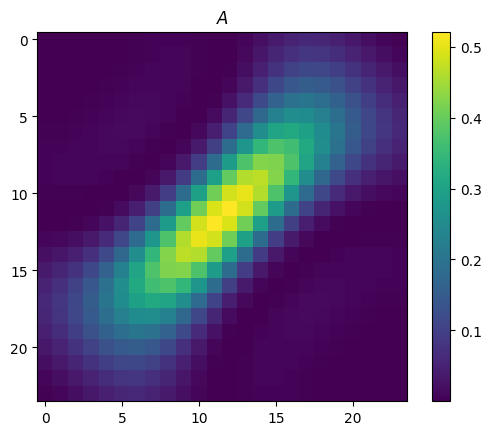

In [21]:
plt.imshow(A)
plt.title("$A$")
plt.colorbar()
plt.show()

Get the SVD (use `np.linalg.svd`).

In [22]:
######################
### Your code here ###
######################
U, s, Vt = np.linalg.svd(A)
V = Vt.T

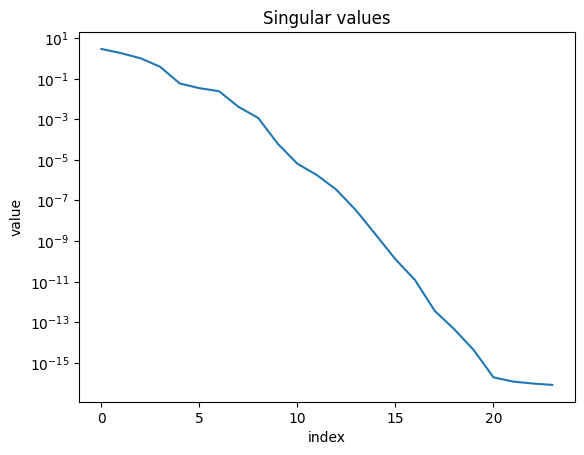

In [23]:
plt.semilogy(s)
plt.title("Singular values")
plt.xlabel("index")
plt.ylabel("value")
plt.show()

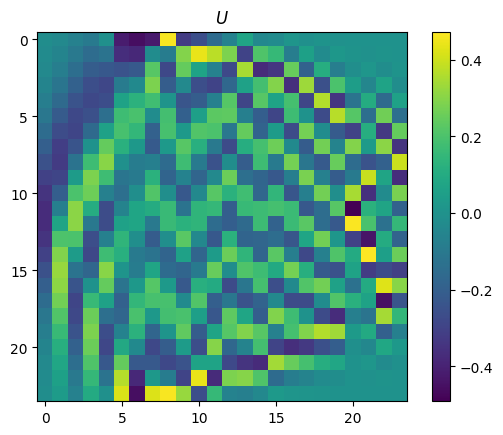

In [24]:
plt.imshow(U)
plt.title("$U$")
plt.colorbar()
plt.show()

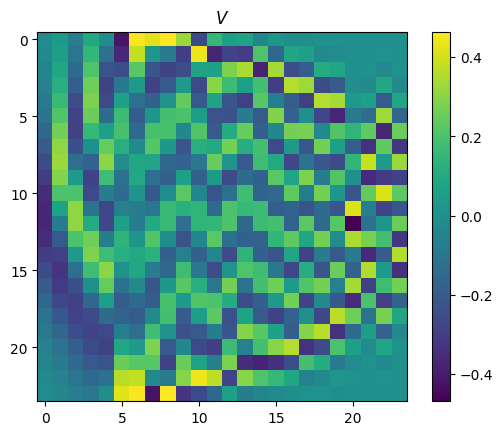

In [25]:
plt.imshow(V)
plt.title("$V$")
plt.colorbar()
plt.show()

What can be said about the number of sign changes in the left and right singular vectors? Try computing the number of sign changes in each vector and plotting them as a function of $i$. For convenience, you can use the function `count_sign_switches` in `hw2_helper_funcs.py`.

**Response:**

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(22), np.int64(20), np.int64(22)]


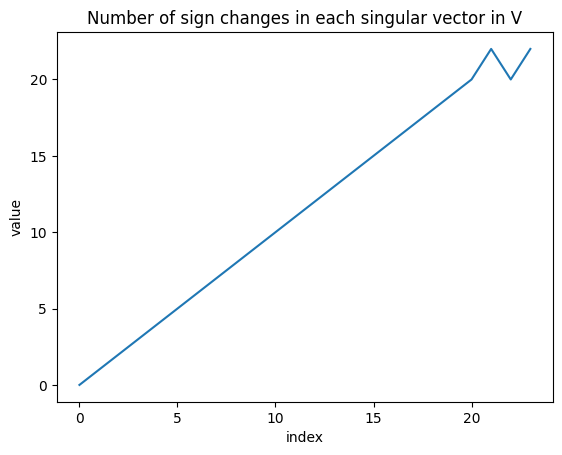

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(21), np.int64(20), np.int64(22), np.int64(23)]


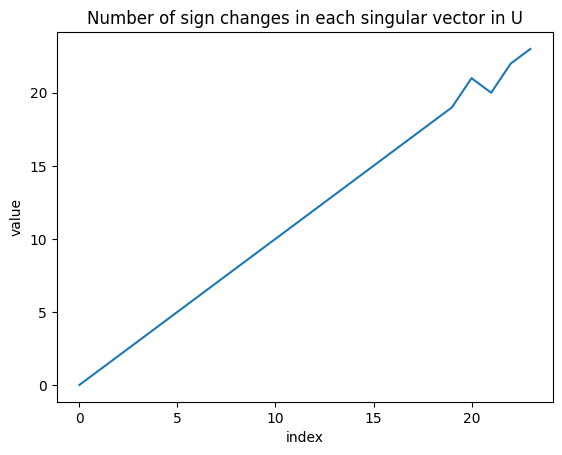

In [26]:
######################
### Your code here ###
######################
# Calculate number of sign changes for each singular vector
num_sign_changes = []
for i in range(V.shape[1]):
    num_sign_changes.append(count_sign_switches(V[:,i]))
print(num_sign_changes)
plt.plot(num_sign_changes)
plt.title("Number of sign changes in each singular vector in V")
plt.xlabel("index")
plt.ylabel("value")
plt.show()
# Same thing for U
num_sign_changes = []
for i in range(U.shape[1]):
    num_sign_changes.append(count_sign_switches(U[:,i]))
print(num_sign_changes)
plt.plot(num_sign_changes)
plt.title("Number of sign changes in each singular vector in U")
plt.xlabel("index")
plt.ylabel("value")
plt.show()

As can be seen from the graphs, the number of sign changes pretty much increases linearly with the index. This is analogous to how the periodicity of the singular functions increased for SVE.

## Part B

Use the function `picard` from `hw2_helper_funcs.py` to inspect the singular values and SVD coefficients. Is the Picard condition satisfied? Why or why not?

**Response:**

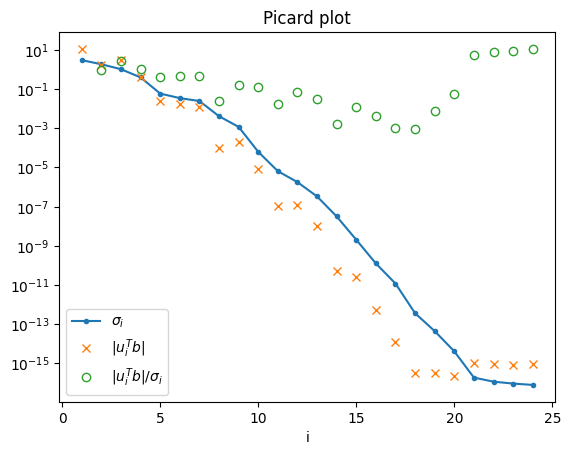

In [27]:
eta = picard(U, s, b_exact)

The Picard condition is basically satisfied, because the eta coefficients don't blow up in comparison to sigma_j. This way, the expansion does not blow up over time.

## Part C

Add a small amount of noise to $b_{\text{exact}}$, i.e., $b = b_{\text{exact}} + e$ with $\| e \|_2/\| b_{\text{exact}} \|_2 = 10^{-10}$. Inpsect the new Picard plot. What happens to the SVD coefficients $u_i^T b$ corresponding to small singular values?

**Response:**

In [28]:
######################
### Your code here ###
######################
delta = np.random.normal(0, 1e-8, b_exact.shape)
b_noisy = b_exact + delta

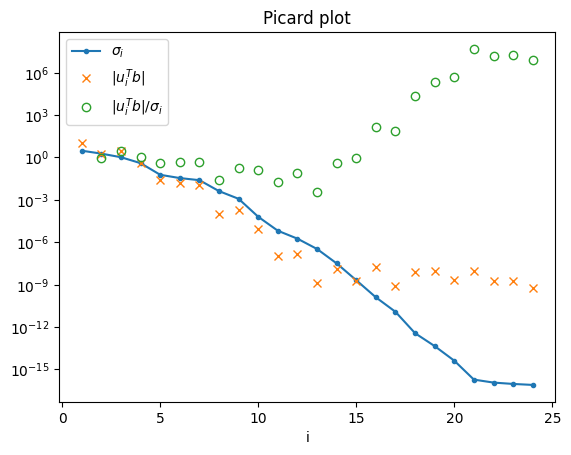

In [29]:
eta = picard(U, s, b_noisy)

In this case, the Picard condition is not satisfied. This is because the eta coefficients start to blow up in comparison to the sigma_j values. This means that the affect of high frequencies in the data will be disproportionately factored into the solution.

# Part D

Compute the partial sums
$$
x_k = \sum_{i=1}^k \frac{u_i^T b}{\sigma_i} v_i, \quad k = 1, \ldots
$$
and inspect the vectors $x_k$ (plot them). Try to explain the behavior of these vectors.

**Response:** 

In [30]:
print(eta)

[0.00000000e+00 9.53143158e-01 2.80740225e+00 1.08925141e+00
 4.17523763e-01 4.77053799e-01 4.86347806e-01 2.43751441e-02
 1.69558625e-01 1.31218928e-01 1.73921604e-02 7.60399566e-02
 3.84055906e-03 4.33195443e-01 8.59565607e-01 1.40920643e+02
 7.00449717e+01 2.23964320e+04 2.08076858e+05 5.33171270e+05
 4.79862048e+07 1.49787208e+07 1.92031042e+07 7.62537609e+06]


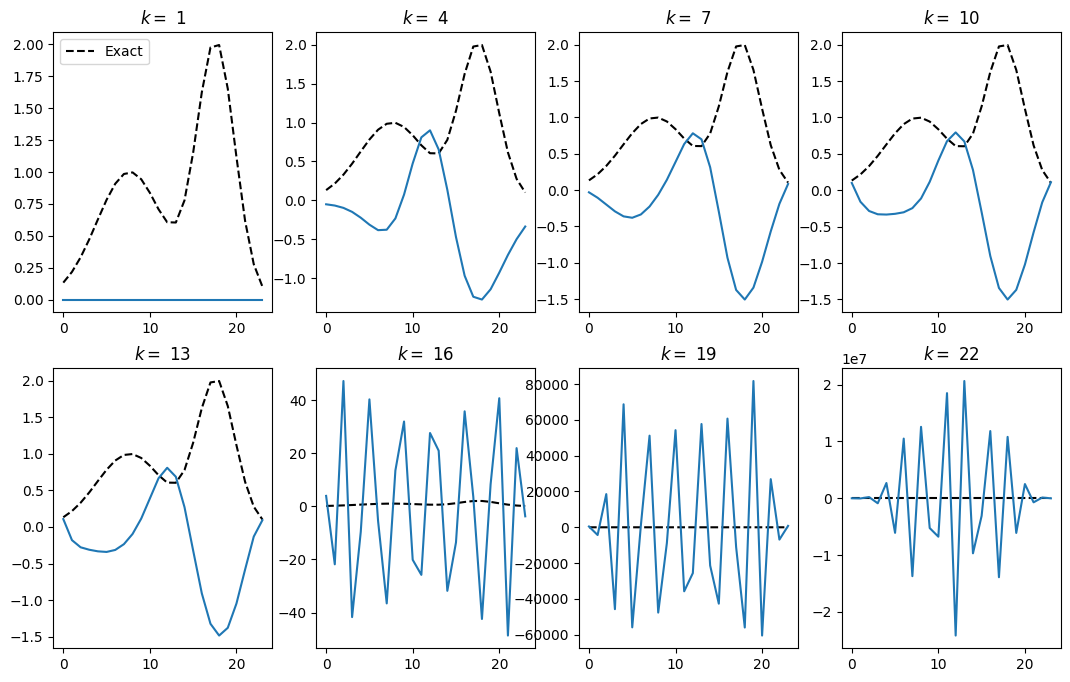

In [31]:
ks = np.arange(1,25,3)
fig, axs = plt.subplots(2,4, figsize=(13,8))

# Iterate over each axis
for j, ax in enumerate(axs.flat):

    # Plot exact solution
    ax.plot(x_exact, label="Exact", color="k", ls="--")
    if j == 0:
        ax.legend()

    # Title
    ax.set_title(f"$k = $ {ks[j]}")

    # Compute xk 

    ######################
    ### Your code here ###
    ######################
    # Compute xk: A linear combination of the first k singular vectors v_i weighted by the eta values
    xk = np.zeros(n)
    for i in range(ks[j]):
        xk += eta[i] * V[:,i]


    # Plot xk
    ax.plot(xk)

This visually shows the breakdown of the Picard condition. As the eta term becomes too large in comparison to the sigma_j term, the noise takes over the solution, and the computed solution no longer approximate the real solution.

# Problem 3.7

## Part A

Choose $m = 40$ and $\eta = 10^{-5}$ and generate a number of instances of white Gaussian noise with standard deviation $\eta$, by means of `e = eta*np.random.normal(size=m)`. Check that the computed values of $\mathcal{E}(e)$, $\mathcal{E}(\| e \|_2^2)$, and $\mathcal{E}(\| e \|_2)$ are in accordance with the results in (3.20). Are they?

**Response:**

In [32]:
# Parameters
m = 40
eta = 1e-5

In [48]:
######################
### Your code here ###
######################
def epsilon(e):
    return np.linalg.norm(e)/np.linalg.norm(b_exact)
def epsilon_norm_squared(e):
    return np.linalg.norm(e)**2/np.linalg.norm(b_exact)**2
def epsilon_norm(e):
    return np.linalg.norm(e)/np.linalg.norm(b_exact)
def gamma(x):
    return gamma_func(x)
e_vals = []
e_norm_squared_vals = []
e_norm_vals = []
for i in range(100):
    e = eta*np.random.normal(size=m)
    e_vals.append(epsilon(e))
    e_norm_squared_vals.append(epsilon_norm_squared(e))
    e_norm_vals.append(epsilon_norm(e))


mean_e_norm = np.mean(e_norm_vals)
mean_e_norm_sq = np.mean(e_norm_squared_vals)
mean_e = np.mean(e_vals)

theoretical_mean_e_norm = eta * (np.sqrt(2) * (gamma((m+1)/2))) / (gamma(m/2))
theoretical_mean_e_norm_sq = (eta**2) * m

In [46]:
print(f"Mean of || e ||_2: {mean_e_norm:5e}")
print(f"Mean of || e ||_2^2: {mean_e_norm_sq:5e}")

Mean of || e ||_2: 5.556406e-06
Mean of || e ||_2^2: 3.119338e-11


In [47]:
print(f"Theoretical mean of || e ||_2: {theoretical_mean_e_norm:5e}")
print(f"Theoretical mean of || e ||_2^2: {theoretical_mean_e_norm_sq:5e}")

Theoretical mean of || e ||_2: 6.285154e-05
Theoretical mean of || e ||_2^2: 4.000000e-09


The results are honestly not that close. I'm not sure what accounts for the error. The results are off by at least one or two orders of magnitude.

## Part B

Set up the same `shaw` problem from the previous problem, with exact rhs vector $b_{\text{exact}}$. Add a noise vector $e$ from part A to get a noisy rhs vector $b_{\text{noisy}}$. What is the relative noise level $\| e \|_2 / \| b_{\text{exact}} \|_2$

**Response:**

In [50]:
# Setup shaw problem
A, b_exact, x_exact = shaw(m)

# Get SVD

######################
### Your code here ###
######################
U, s, Vt = np.linalg.svd(A)
V = Vt.T

# Get noisy b
delta = np.random.normal(0, eta, b_exact.shape)
b_noisy = b_exact + delta

noise_level = np.linalg.norm(delta)/np.linalg.norm(b_exact)

In [51]:
print(f"Noise level: {noise_level:3e}")

Noise level: 4.625132e-06


## Part C

Use a semilogarithmic plot to show absolute values of the elements of $U^T b_{\text{exact}}$ and $U^T e$, and explain the behavior of these plots. In particular, explain why both graphs tend to level off in the right part of the plot, and explain the magnitude of the plateau.

**Response:**

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
/var/folders/v3/4n07n0wx3dq1zjxhjbt61wyc0000gn/T/ipykernel_28942/1249808147.py:13: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(utb_noise_abs, label="$|U^T \delta|$")
/var/folders/v3/4n07n0wx3dq1zjxhjbt61wyc0000gn/T/ipykernel_28942/1249808147.py:16: SyntaxWarning: invalid escape sequence '\d'
  plt.title("Absolute values of $U^T b_{exact}$ and $U^T \delta$")


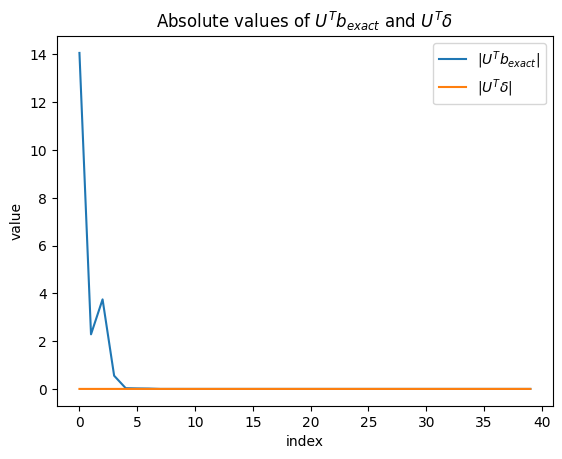

In [52]:
#######################
### Your code here ###
######################
utb_exact = U.T @ b_exact
utb_noise = U.T @ delta

# Get the absolute value of all the elements in utb_exact and utb_noise
utb_exact_abs = np.abs(utb_exact)
utb_noise_abs = np.abs(utb_noise)

# Plot the results
plt.plot(utb_exact_abs, label="$|U^T b_{exact}|$")
plt.plot(utb_noise_abs, label="$|U^T \delta|$")
plt.xlabel("index")
plt.ylabel("value")
plt.title("Absolute values of $U^T b_{exact}$ and $U^T \delta$")
plt.legend()
plt.show()

The semilogarithmic plot of the absolute values of the elements of (U^T b_exact) and (U^T e) levels off in the right part of the plot due to the orthonormal properties of the matrix (U) and the nature of the vectors (b_exact) and (e). As you move to the right, the elements correspond to projections onto basis vectors that capture less significant components of these vectors, resulting in smaller and similar magnitudes. This leveling off indicates that the significant information is captured by the initial components, while the plateau represents the noise level or the smallest significant values in the transformed vectors.

## Part D

Show that if you want to generate a noisy rhs with a given noise level $\| e \|_2 / \| b_{\text{exact}} \|_2$ = `rnl`, you should use the Python code:
```python
e = np.random.normal(m)
e = e/np.linalg.norm(e)
e = rnl*np.linalg.norm(b_exact)*e
b = b_exact + e
```

**Response:**